# Summary
Thie code was used to plot figure 2E. 

At first, we used scTSS to fetch all TSS for all the 15 organs. 

Then used these TSSs to plot heatmap.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import scanpy as sc
import scanpy as sc
import pandas as pd
import numpy as np
import itertools
from scipy.spatial import distance
import seaborn as sns
from matplotlib.pyplot import gcf
import matplotlib.pyplot as plt

In [4]:
adata=sc.read('/storage/yhhuang/users/ruiyan/15organ/mergeall/scTSS_output/count/scTSS_count_all.h5ad')
adata

AnnData object with n_obs × n_vars = 80951 × 21125
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len'

In [5]:
clusterdf=pd.read_csv('/storage/yhhuang/users/ruiyan/15organ/mergeall/all_cluster.csv',delimiter='\t',index_col=0)
clusterdf

,cluster
cell_id,
AAACCTGAGACACTAA-1-SRR13075718,Monocyte
AAACCTGAGCATGGCA-1-SRR13075718,Macrophage cell
AAACCTGAGCTGAACG-1-SRR13075718,NK/T cell
AAACCTGCAAGCTGGA-1-SRR13075718,Fibroblast
AAACCTGCATTACCTT-1-SRR13075718,NK/T cell
...,...
TTTGTCATCAGTTGAC-1-SRR13075732,B cell
TTTGTCATCATCATTC-1-SRR13075732,Macrophage cell
TTTGTCATCTACGAGT-1-SRR13075732,NK/T cell


In [6]:
adata.obs['cluster']=adata.obs.index.map(clusterdf['cluster'])
adata

AnnData object with n_obs × n_vars = 80951 × 21125
    obs: 'cluster'
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len'

In [7]:
adata.obs['cluster']

adata.obs['sample_id']=adata.obs.index.copy()
adata

AnnData object with n_obs × n_vars = 80951 × 21125
    obs: 'cluster', 'sample_id'
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len'

In [8]:
adata.obs['sample_id']=adata.obs['sample_id'].str.split('-',expand=True)[2]
adata

AnnData object with n_obs × n_vars = 80951 × 21125
    obs: 'cluster', 'sample_id'
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len'

In [9]:
adata.obs['sample_id']

ACATACGGTCTCAACA-1-SRR13075730    SRR13075730
ATGCGATGTTCCACGG-1-SRR13075724    SRR13075724
TGGTTAGTCGGAATCT-1-SRR13075718    SRR13075718
GGAGCAAAGTGAAGTT-1-SRR13075718    SRR13075718
ACATGGTGTATAGGTA-1-SRR13075732    SRR13075732
                                     ...     
GCTGGGTTCTCGCATC-1-SRR13075730    SRR13075730
TTAGGACGTTGTTTGG-1-SRR13075729    SRR13075729
AACTCTTCAGCCAATT-1-SRR13075732    SRR13075732
ACGGGCTTCGCTTAGA-1-SRR13075731    SRR13075731
CAAGATCTCCAGAAGG-1-SRR13075722    SRR13075722
Name: sample_id, Length: 80951, dtype: object

In [10]:
onesample=adata[adata.obs['sample_id']=='SRR13075730',:]
onesample

View of AnnData object with n_obs × n_vars = 4115 × 21125
    obs: 'cluster', 'sample_id'
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len'

In [11]:
def get_new_adata_umi_count(sample):
    
    onesample=adata[adata.obs['sample_id']==sample,:]
    clusterls=[]
    for i in onesample.obs['cluster'].unique():
        cellcluster=onesample[onesample.obs['cluster']==i,:]
        clusterarray=cellcluster.X.toarray().sum(axis=0)/(cellcluster.X.toarray().sum())
        namestr=str(sample)+'_'+str(i)
        clusterls.append(namestr)
        clusterls.append(clusterarray)
    return clusterls

In [12]:
allsamplels=[]
for i in range(18,33):
    sample="SRR130757"+str(i)
    allsamplels.append(get_new_adata_umi_count(sample))
    

In [13]:
allsamplels

def flatten(A):
    rt = []
    for i in A:
        if isinstance(i,list): rt.extend(flatten(i))
        else: rt.append(i)
    return rt

In [14]:
newsamplels=flatten(allsamplels)
newsamplels

['SRR13075718_Endothelial Cell',
 array([0.0000000e+00, 0.0000000e+00, 1.9350407e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00], dtype=float32),
 'SRR13075718_Fibroblast',
 array([1.8786523e-06, 1.8786523e-06, 3.5694393e-05, ..., 3.3815741e-05,
        1.8786523e-06, 9.3932613e-07], dtype=float32),
 'SRR13075718_Epithelial Cell',
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'SRR13075718_NK/T cell',
 array([0.0000000e+00, 9.9635663e-06, 3.3211888e-06, ..., 0.0000000e+00,
        0.0000000e+00, 6.6423777e-06], dtype=float32),
 'SRR13075718_Smooth Muscle Cell',
 array([1.7740877e-05, 0.0000000e+00, 1.7740877e-05, ..., 1.7740877e-05,
        0.0000000e+00, 8.8704383e-06], dtype=float32),
 'SRR13075718_FibSmo Cell',
 array([3.6937033e-06, 4.9249379e-06, 3.3489577e-04, ..., 1.4774813e-05,
        0.0000000e+00, 6.1561723e-06], dtype=float32),
 'SRR13075718_B cell',
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'SRR13075718_Macrophage cell',
 array([0.000000

In [15]:
len(newsamplels)

340

In [16]:
arrayls=newsamplels[1::2]
arrayls

[array([0.0000000e+00, 0.0000000e+00, 1.9350407e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00], dtype=float32),
 array([1.8786523e-06, 1.8786523e-06, 3.5694393e-05, ..., 3.3815741e-05,
        1.8786523e-06, 9.3932613e-07], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.0000000e+00, 9.9635663e-06, 3.3211888e-06, ..., 0.0000000e+00,
        0.0000000e+00, 6.6423777e-06], dtype=float32),
 array([1.7740877e-05, 0.0000000e+00, 1.7740877e-05, ..., 1.7740877e-05,
        0.0000000e+00, 8.8704383e-06], dtype=float32),
 array([3.6937033e-06, 4.9249379e-06, 3.3489577e-04, ..., 1.4774813e-05,
        0.0000000e+00, 6.1561723e-06], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.0000000e+00, 0.0000000e+00, 6.7994833e-06, ..., 2.0398449e-05,
        0.0000000e+00, 6.7994833e-06], dtype=float32),
 array([1.5548714e-05, 0.0000000e+00, 0.0000000e+00, ..., 1.5548714e-05,
        0.0000000e+00, 0.0000000e+00], dtype=float3

In [17]:
namels=newsamplels[::2]
namels

['SRR13075718_Endothelial Cell',
 'SRR13075718_Fibroblast',
 'SRR13075718_Epithelial Cell',
 'SRR13075718_NK/T cell',
 'SRR13075718_Smooth Muscle Cell',
 'SRR13075718_FibSmo Cell',
 'SRR13075718_B cell',
 'SRR13075718_Macrophage cell',
 'SRR13075718_Monocyte',
 'SRR13075718_Secretory Cell',
 'SRR13075718_Melanocyte',
 'SRR13075718_Plasma Cell',
 'SRR13075718_Keratinocyte',
 'SRR13075718_Erythrocyte',
 'SRR13075719_NK/T cell',
 'SRR13075719_B cell',
 'SRR13075719_Monocyte',
 'SRR13075719_Plasma Cell',
 'SRR13075719_Secretory Cell',
 'SRR13075719_Macrophage cell',
 'SRR13075719_Erythrocyte',
 'SRR13075719_Epithelial Cell',
 'SRR13075720_Macrophage cell',
 'SRR13075720_NK/T cell',
 'SRR13075720_Cholangiocyte',
 'SRR13075720_Endothelial Cell',
 'SRR13075720_Monocyte',
 'SRR13075720_Melanocyte',
 'SRR13075720_Fibroblast',
 'SRR13075720_Smooth Muscle Cell',
 'SRR13075720_FibSmo Cell',
 'SRR13075720_B cell',
 'SRR13075720_Erythrocyte',
 'SRR13075720_Secretory Cell',
 'SRR13075720_Absorptive C

In [18]:
array_dict=dict(zip(namels,arrayls))
array_dict

{'SRR13075718_Endothelial Cell': array([0.0000000e+00, 0.0000000e+00, 1.9350407e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00], dtype=float32),
 'SRR13075718_Fibroblast': array([1.8786523e-06, 1.8786523e-06, 3.5694393e-05, ..., 3.3815741e-05,
        1.8786523e-06, 9.3932613e-07], dtype=float32),
 'SRR13075718_Epithelial Cell': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'SRR13075718_NK/T cell': array([0.0000000e+00, 9.9635663e-06, 3.3211888e-06, ..., 0.0000000e+00,
        0.0000000e+00, 6.6423777e-06], dtype=float32),
 'SRR13075718_Smooth Muscle Cell': array([1.7740877e-05, 0.0000000e+00, 1.7740877e-05, ..., 1.7740877e-05,
        0.0000000e+00, 8.8704383e-06], dtype=float32),
 'SRR13075718_FibSmo Cell': array([3.6937033e-06, 4.9249379e-06, 3.3489577e-04, ..., 1.4774813e-05,
        0.0000000e+00, 6.1561723e-06], dtype=float32),
 'SRR13075718_B cell': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'SRR13075718_Macrophage cell': array([0.0000000e+00, 0

In [19]:
JSDdict={}
for i in namels:
    for j in namels:
#         print(i)
#         print(j)
        comparenamels=i+'_VS_'+j
        jsdnum=np.corrcoef(array_dict[i],array_dict[j])
        JSDdict[comparenamels]=jsdnum[0,1]


In [20]:
JSDdict

JSDdf=pd.DataFrame.from_dict(JSDdict,orient='index')
JSDdf

,0
SRR13075718_Endothelial Cell_VS_SRR13075718_Endothelial Cell,1.000000
SRR13075718_Endothelial Cell_VS_SRR13075718_Fibroblast,0.321846
SRR13075718_Endothelial Cell_VS_SRR13075718_Epithelial Cell,0.207513
SRR13075718_Endothelial Cell_VS_SRR13075718_NK/T cell,0.273088
SRR13075718_Endothelial Cell_VS_SRR13075718_Smooth Muscle Cell,0.304033
...,...
SRR13075732_FibSmo Cell_VS_SRR13075732_Enterocyte,0.025964
SRR13075732_FibSmo Cell_VS_SRR13075732_Keratinocyte,0.028424
SRR13075732_FibSmo Cell_VS_SRR13075732_Epithelial Cell,0.016573
SRR13075732_FibSmo Cell_VS_SRR13075732_Plasma Cell,0.058688


In [21]:
JSDdf.reset_index(inplace=True)
JSDdf

,index,0
0,SRR13075718_Endothelial Cell_VS_SRR13075718_En...,1.000000
1,SRR13075718_Endothelial Cell_VS_SRR13075718_Fi...,0.321846
2,SRR13075718_Endothelial Cell_VS_SRR13075718_Ep...,0.207513
3,SRR13075718_Endothelial Cell_VS_SRR13075718_NK...,0.273088
4,SRR13075718_Endothelial Cell_VS_SRR13075718_Sm...,0.304033
...,...,...
28895,SRR13075732_FibSmo Cell_VS_SRR13075732_Enterocyte,0.025964
28896,SRR13075732_FibSmo Cell_VS_SRR13075732_Keratin...,0.028424
28897,SRR13075732_FibSmo Cell_VS_SRR13075732_Epithel...,0.016573
28898,SRR13075732_FibSmo Cell_VS_SRR13075732_Plasma ...,0.058688


In [22]:
JSDdf['first_axis']=JSDdf['index'].str.split('_VS',expand=True)[0]
JSDdf['second_axis']=JSDdf['index'].str.split('VS_',expand=True)[1]
JSDdf

,index,0,first_axis,second_axis
0,SRR13075718_Endothelial Cell_VS_SRR13075718_En...,1.000000,SRR13075718_Endothelial Cell,SRR13075718_Endothelial Cell
1,SRR13075718_Endothelial Cell_VS_SRR13075718_Fi...,0.321846,SRR13075718_Endothelial Cell,SRR13075718_Fibroblast
2,SRR13075718_Endothelial Cell_VS_SRR13075718_Ep...,0.207513,SRR13075718_Endothelial Cell,SRR13075718_Epithelial Cell
3,SRR13075718_Endothelial Cell_VS_SRR13075718_NK...,0.273088,SRR13075718_Endothelial Cell,SRR13075718_NK/T cell
4,SRR13075718_Endothelial Cell_VS_SRR13075718_Sm...,0.304033,SRR13075718_Endothelial Cell,SRR13075718_Smooth Muscle Cell
...,...,...,...,...
28895,SRR13075732_FibSmo Cell_VS_SRR13075732_Enterocyte,0.025964,SRR13075732_FibSmo Cell,SRR13075732_Enterocyte
28896,SRR13075732_FibSmo Cell_VS_SRR13075732_Keratin...,0.028424,SRR13075732_FibSmo Cell,SRR13075732_Keratinocyte
28897,SRR13075732_FibSmo Cell_VS_SRR13075732_Epithel...,0.016573,SRR13075732_FibSmo Cell,SRR13075732_Epithelial Cell
28898,SRR13075732_FibSmo Cell_VS_SRR13075732_Plasma ...,0.058688,SRR13075732_FibSmo Cell,SRR13075732_Plasma Cell


In [23]:
newJSDdf=JSDdf.pivot(index='first_axis',columns='second_axis',values=0)
newJSDdf

second_axis,SRR13075718_B cell,SRR13075718_Endothelial Cell,SRR13075718_Epithelial Cell,SRR13075718_Erythrocyte,SRR13075718_FibSmo Cell,SRR13075718_Fibroblast,SRR13075718_Keratinocyte,SRR13075718_Macrophage cell,SRR13075718_Melanocyte,SRR13075718_Monocyte,...,SRR13075732_Epithelial Cell,SRR13075732_FibSmo Cell,SRR13075732_Fibroblast,SRR13075732_Keratinocyte,SRR13075732_Macrophage cell,SRR13075732_Monocyte,SRR13075732_NK/T cell,SRR13075732_Plasma Cell,SRR13075732_Secretory Cell,SRR13075732_Smooth Muscle Cell
first_axis,,,,,,,,,,,,,,,,,,,,,
SRR13075718_B cell,1.000000,0.247231,0.184620,0.201324,0.299808,0.255839,0.097584,0.425340,0.204537,0.332171,...,0.019230,0.006733,0.094088,0.040696,0.081089,0.089143,0.159359,0.110565,0.076068,0.065662
SRR13075718_Endothelial Cell,0.247231,1.000000,0.207513,0.167560,0.353740,0.321846,0.203909,0.286340,0.219099,0.224843,...,0.026773,0.013527,0.119480,0.044509,0.057312,0.057661,0.084669,0.065838,0.108069,0.112359
SRR13075718_Epithelial Cell,0.184620,0.207513,1.000000,0.410212,0.268389,0.227559,0.044366,0.185752,0.154471,0.180347,...,0.033493,0.012410,0.081431,0.053495,0.042279,0.044330,0.062297,0.055310,0.098763,0.089837
SRR13075718_Erythrocyte,0.201324,0.167560,0.410212,1.000000,0.222456,0.217147,0.033520,0.188894,0.131081,0.180810,...,0.037064,0.009342,0.086599,0.038469,0.044856,0.051345,0.063605,0.059024,0.084732,0.064781
SRR13075718_FibSmo Cell,0.299808,0.353740,0.268389,0.222456,1.000000,0.737091,0.110545,0.299946,0.403086,0.255978,...,0.034653,0.025471,0.232788,0.063608,0.068082,0.065104,0.106093,0.085955,0.125471,0.127599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR13075732_Monocyte,0.089143,0.057661,0.044330,0.051345,0.065104,0.067318,0.016997,0.316468,0.045435,0.411217,...,0.088291,0.081330,0.311399,0.124757,0.793379,1.000000,0.385548,0.253338,0.276050,0.204486
SRR13075732_NK/T cell,0.159359,0.084669,0.062297,0.063605,0.106093,0.091275,0.019603,0.136916,0.076909,0.142726,...,0.122383,0.064408,0.462130,0.209529,0.370218,0.385548,1.000000,0.444730,0.384236,0.313158
SRR13075732_Plasma Cell,0.110565,0.065838,0.055310,0.059024,0.085955,0.082032,0.007296,0.091603,0.063115,0.081267,...,0.108080,0.058688,0.376061,0.171511,0.254623,0.253338,0.444730,1.000000,0.318926,0.243242


In [24]:
#newJSDdf.to_csv('/storage/yhhuang/users/ruiyan/15organ/figure/JSD_splicing.csv')

labeldf=pd.DataFrame(newJSDdf.index)
labeldf

,first_axis
0,SRR13075718_B cell
1,SRR13075718_Endothelial Cell
2,SRR13075718_Epithelial Cell
3,SRR13075718_Erythrocyte
4,SRR13075718_FibSmo Cell
...,...
165,SRR13075732_Monocyte
166,SRR13075732_NK/T cell
167,SRR13075732_Plasma Cell
168,SRR13075732_Secretory Cell


In [25]:
labeldf['organ']=labeldf['first_axis'].str.split('_',expand=True)[0]
labeldf['cell_type']=labeldf['first_axis'].str.split('_',expand=True)[1]
labeldf

,first_axis,organ,cell_type
0,SRR13075718_B cell,SRR13075718,B cell
1,SRR13075718_Endothelial Cell,SRR13075718,Endothelial Cell
2,SRR13075718_Epithelial Cell,SRR13075718,Epithelial Cell
3,SRR13075718_Erythrocyte,SRR13075718,Erythrocyte
4,SRR13075718_FibSmo Cell,SRR13075718,FibSmo Cell
...,...,...,...
165,SRR13075732_Monocyte,SRR13075732,Monocyte
166,SRR13075732_NK/T cell,SRR13075732,NK/T cell
167,SRR13075732_Plasma Cell,SRR13075732,Plasma Cell
168,SRR13075732_Secretory Cell,SRR13075732,Secretory Cell


In [26]:
organdict={'SRR13075718':'bladder','SRR13075719':'blood','SRR13075720':'common bile duct','SRR13075721':'esophagus',
          'SRR13075722':'heart','SRR13075723':'liver','SRR13075724':'lymph node','SRR13075725':'marrow','SRR13075726':'muscle',
          'SRR13075727':'rectum','SRR13075728':'skin','SRR13075729':'small intestine','SRR13075730':'spleen',
           'SRR13075731':'stomach','SRR13075732':'trachea'}

In [27]:
labeldf['organ']=labeldf['organ'].map(organdict)
labeldf

,first_axis,organ,cell_type
0,SRR13075718_B cell,bladder,B cell
1,SRR13075718_Endothelial Cell,bladder,Endothelial Cell
2,SRR13075718_Epithelial Cell,bladder,Epithelial Cell
3,SRR13075718_Erythrocyte,bladder,Erythrocyte
4,SRR13075718_FibSmo Cell,bladder,FibSmo Cell
...,...,...,...
165,SRR13075732_Monocyte,trachea,Monocyte
166,SRR13075732_NK/T cell,trachea,NK/T cell
167,SRR13075732_Plasma Cell,trachea,Plasma Cell
168,SRR13075732_Secretory Cell,trachea,Secretory Cell


In [28]:
import colorcet as cc
lut = dict(zip(set(labeldf['cell_type']), sns.color_palette(cc.glasbey,len(set(labeldf['cell_type'])))))
lut

{'Epithelial Cell': (0.8392156862745098, 0.0, 0.0),
 'Fibroblast': (0.5490196078431373, 0.23137254901960785, 1.0),
 'Absorptive Cell': (0.00392156862745098, 0.5294117647058824, 0.0),
 'Enterocyte': (0.0, 0.6745098039215687, 0.7764705882352941),
 'Satellite Cell': (0.592156862745098, 1.0, 0.0),
 'Melanocyte': (1.0, 0.49411764705882355, 0.8196078431372549),
 'Basal Cell': (0.4196078431372549, 0.0, 0.30980392156862746),
 'Tuft Cell': (1.0, 0.6470588235294118, 0.1843137254901961),
 'Smooth Muscle Cell': (0.3411764705882353, 0.23137254901960785, 0.0),
 'Macrophage cell': (0.0, 0.33725490196078434, 0.34901960784313724),
 'NK/T cell': (0.0, 0.0, 0.8666666666666667),
 'B cell': (0.0, 0.9921568627450981, 0.8117647058823529),
 'Monocyte': (0.6313725490196078, 0.4588235294117647, 0.4117647058823529),
 'Erythrocyte': (0.7372549019607844, 0.7137254901960784, 1.0),
 'Cholangiocyte': (0.5843137254901961, 0.7098039215686275, 0.4666666666666667),
 'FibSmo Cell': (0.7490196078431373, 0.01176470588235294

In [29]:
row_colors=labeldf['cell_type'].map(lut)
row_colors

0          (0.0, 0.9921568627450981, 0.8117647058823529)
1                         (0.4745098039215686, 0.0, 0.0)
2                         (0.8392156862745098, 0.0, 0.0)
3          (0.7372549019607844, 0.7137254901960784, 1.0)
4      (0.7490196078431373, 0.011764705882352941, 0.7...
                             ...                        
165    (0.6313725490196078, 0.4588235294117647, 0.411...
166                       (0.0, 0.0, 0.8666666666666667)
167    (0.39215686274509803, 0.32941176470588235, 0.4...
168    (0.027450980392156862, 0.4549019607843137, 0.8...
169       (0.3411764705882353, 0.23137254901960785, 0.0)
Name: cell_type, Length: 170, dtype: object

In [30]:
lut2 = dict(zip(set(labeldf['organ']), sns.color_palette(cc.glasbey,len(set(labeldf['organ'])))))
lut2

{'spleen': (0.8392156862745098, 0.0, 0.0),
 'stomach': (0.5490196078431373, 0.23137254901960785, 1.0),
 'trachea': (0.00392156862745098, 0.5294117647058824, 0.0),
 'skin': (0.0, 0.6745098039215687, 0.7764705882352941),
 'heart': (0.592156862745098, 1.0, 0.0),
 'blood': (1.0, 0.49411764705882355, 0.8196078431372549),
 'bladder': (0.4196078431372549, 0.0, 0.30980392156862746),
 'small intestine': (1.0, 0.6470588235294118, 0.1843137254901961),
 'esophagus': (0.3411764705882353, 0.23137254901960785, 0.0),
 'muscle': (0.0, 0.33725490196078434, 0.34901960784313724),
 'rectum': (0.0, 0.0, 0.8666666666666667),
 'common bile duct': (0.0, 0.9921568627450981, 0.8117647058823529),
 'lymph node': (0.6313725490196078, 0.4588235294117647, 0.4117647058823529),
 'liver': (0.7372549019607844, 0.7137254901960784, 1.0),
 'marrow': (0.5843137254901961, 0.7098039215686275, 0.4666666666666667)}

In [31]:
row_colors2=labeldf['organ'].map(lut2)
row_colors2

0      (0.4196078431372549, 0.0, 0.30980392156862746)
1      (0.4196078431372549, 0.0, 0.30980392156862746)
2      (0.4196078431372549, 0.0, 0.30980392156862746)
3      (0.4196078431372549, 0.0, 0.30980392156862746)
4      (0.4196078431372549, 0.0, 0.30980392156862746)
                            ...                      
165    (0.00392156862745098, 0.5294117647058824, 0.0)
166    (0.00392156862745098, 0.5294117647058824, 0.0)
167    (0.00392156862745098, 0.5294117647058824, 0.0)
168    (0.00392156862745098, 0.5294117647058824, 0.0)
169    (0.00392156862745098, 0.5294117647058824, 0.0)
Name: organ, Length: 170, dtype: object

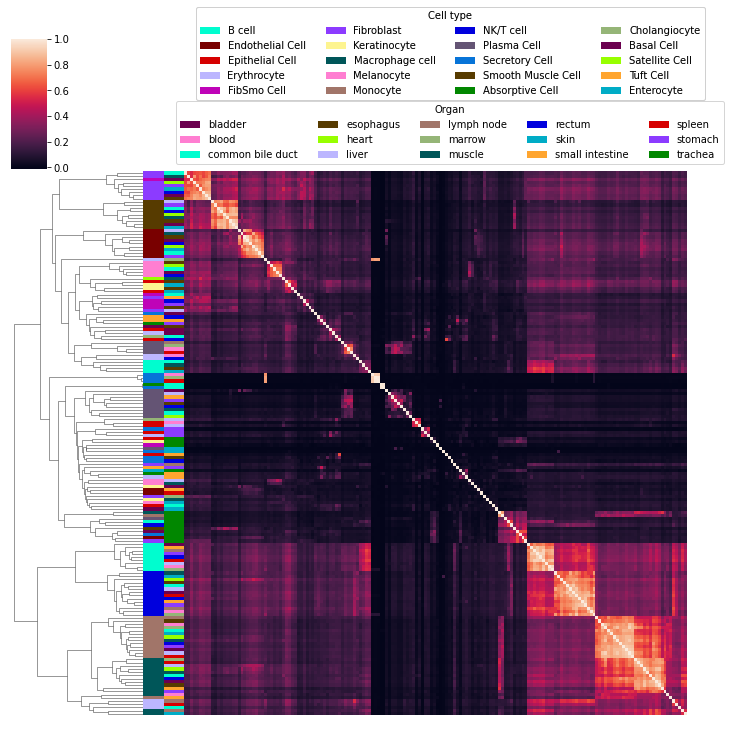

In [32]:
fig=sns.clustermap(newJSDdf,yticklabels=False,row_colors=[row_colors, row_colors2],xticklabels=False)
fig.ax_col_dendrogram.set_visible(False)
fig.ax_heatmap.set_xlabel(" ")
fig.ax_heatmap.set_ylabel(" ")
for label in labeldf['organ'].unique():
    fig.ax_row_dendrogram.bar(0, 0, color=lut2[label],label=label, linewidth=0)
l1=fig.ax_row_dendrogram.legend(title='Organ', loc="center", ncol=5, bbox_to_anchor=(0.63, 0.85), bbox_transform=gcf().transFigure) 


xx = []

for label in labeldf['cell_type'].unique():
    l2=fig.ax_row_dendrogram.bar(0, 0, color=lut[label],label=label, linewidth=0)
    xx.append(l2)
legend2 = plt.legend(xx,labeldf['cell_type'].unique(), ncol=4,loc="center", title='Cell type', bbox_to_anchor=(.63, 0.96), bbox_transform=gcf().transFigure)

    
    #l2=fig.ax_row_dendrogram.legend(title='cell type', loc="center", ncol=2, bbox_to_anchor=(0.8, 0.8), bbox_transform=gcf().transFigure) 

plt.gca().add_artist(legend2)
#fig.savefig('/storage/yhhuang/users/ruiyan/figure/figure3/pearson_splicing_heatmap.pdf',dpi=300,bbox_inches='tight')
plt.show()